# Lab 4. Homework

In this homework you will implement a Jackknife residuals from scratch.

***Note:*** the detailed description of Jackknife will be provided later in the course.

## Necessary imports & data definition

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

Text(0.5, 1.0, 'Generated data')

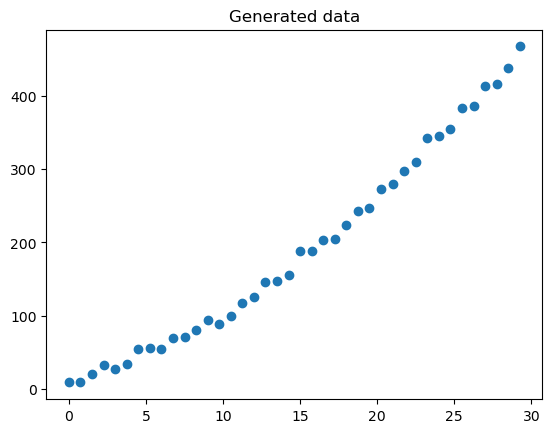

In [3]:
np.random.seed(42)
X = np.arange(0, 30, 0.75).reshape(-1, 1)
Y = 5 + 7 * X + 0.3 * X ** 2 + 7 * np.random.randn(*X.shape)

plt.scatter(X, Y)
plt.title('Generated data')

In [4]:
def polyreg_model(degree):
  return Pipeline([
      ('polynomial_features', PolynomialFeatures(degree)),
      ('linear_regression', LinearRegression())
  ])

## Simple residuals

The basic form of residuals is given as:

$$
  e_i = y_i - \hat{y}_i
$$

where $y_i$ - is a true value of the response and $\hat{y}_i$ - is a model prediction.

**Task 1.1**: compute simple residuals for `polyreg_model` of degree 1 and draw a scatter plot for residuals against the predicted values.

Text(0, 0.5, 'Resudual, $y - y_{pred}$')

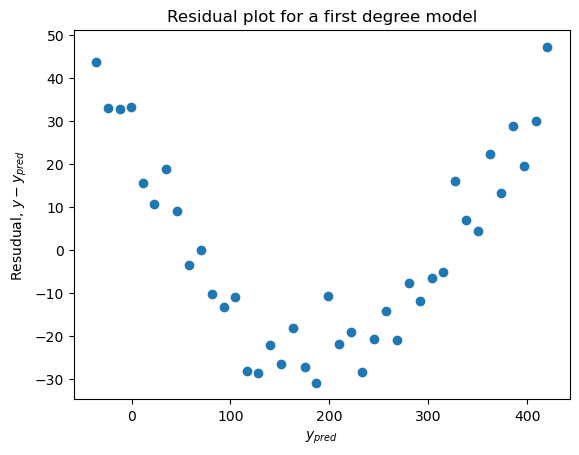

In [23]:
model = polyreg_model(1)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred
plt.scatter(y_pred, residuals)
plt.title("Residual plot for a first degree model")
plt.xlabel(r"$y_{pred}$")
plt.ylabel(r"Resudual, $y - y_{pred}$")

**Task 1.2: what can you say about the behaviour of the model? (Overfit/underfit/perfect fit). Provide an argument.**

The model is clearly underfitted, since the residual error variates from -30 to 50. Moreover, the error is not normally distributed, but has parabolic shape.

**Task 2.1**: repeat the same process for the 2nd degree model

Text(0, 0.5, 'Resudual, $y - y_{pred}$')

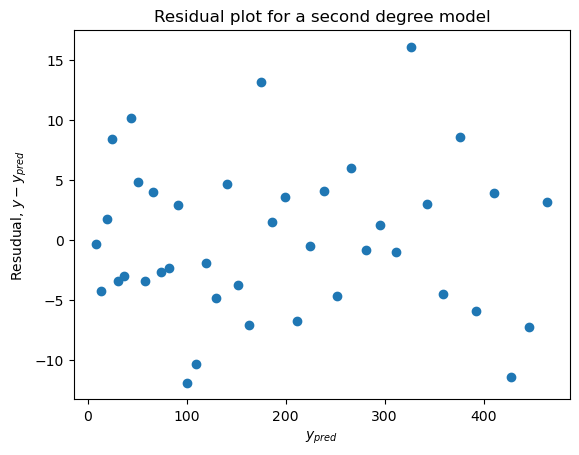

In [22]:
model = polyreg_model(2)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = Y - y_pred
plt.scatter(y_pred, residuals)
plt.title("Residual plot for a second degree model")
plt.xlabel(r"$y_{pred}$")
plt.ylabel(r"Resudual, $y - y_{pred}$")

**Task 2.2**: What do you see? Compare to a previous result.
Now the error become more uniformly distributed, but it still has large fluctuation from -10 to 15. Now it seems perfectly fitted, error corresponds to the noize from initial data

## Jackknife residuals
The Jackknife residual (or R-Student residual) is defined as

$$
  r_{(-i)} = \frac{e_i}{\sqrt{MSE_{(-i)}(1 - h_i)}}
$$

where $MSE_{(-i)}$ is a residual MSE computed withoit $i$-th observation. We compute $MSE = \frac{\sum e_i^2}{n - p - 1}$ where $p$ is a number of features. $h_i$ is $i$-th diagonal element of the projection matrix $H = X(X^TX)^{-1}X^T$.

If an observation has a Jackknife residual that is larger than 3 (in absolute value) we can call it an *outlier*.


**Task 3.1**: finalize the Jackknife residuals. Draw a residual plots for the 1st and 2nd degree models and compare those to ones you had before.</font>

In [12]:
def jackknife_residuals(X, y, y_pred, p):
  H = X @ np.linalg.inv(X.T @ X) @ X.T
  r = []
  err = y - y_pred
  err_sum_sq = err.T @ err
  n = len(y)
  for i in range(n):
    err_i = err[i] 
    mse = (err_sum_sq - err_i**2) / (n - p - 1)
    r.append(err_i / np.sqrt(mse * (1-H[i, i])))
  
  return np.array(r)

Text(0, 0.5, 'Jacckine residual, $r_{(-i)} = \\frac{e_i}{MSE_{-i}(1-h_i)}$')

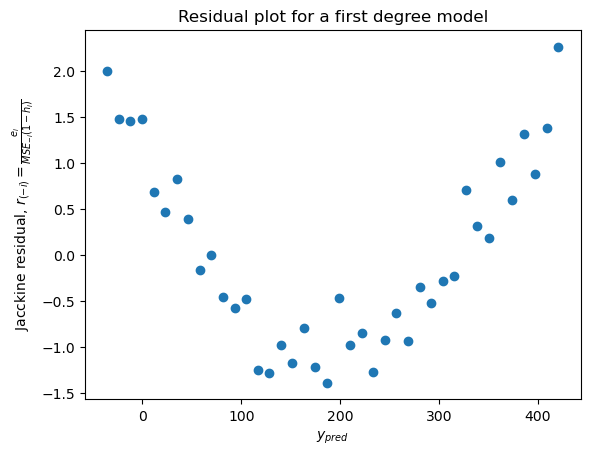

In [26]:
n_features = 1
model = polyreg_model(n_features)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = jackknife_residuals(X, Y, y_pred, n_features+1)
plt.scatter(y_pred, residuals)
plt.title("Residual plot for a first degree model")
plt.xlabel(r"$y_{pred}$")
plt.ylabel(r"Jacckine residual, $r_{(-i)} = \frac{e_i}{MSE_{-i}(1-h_i)}$")

Text(0, 0.5, 'Jacckine residual, $r_{(-i)} = \\frac{e_i}{MSE_{-i}(1-h_i)}$')

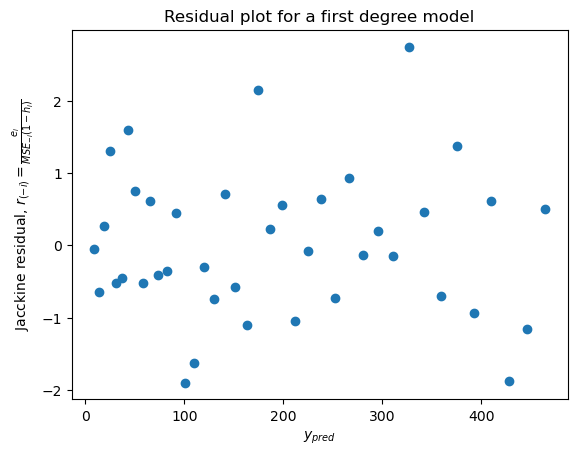

In [27]:
n_features = 2
model = polyreg_model(n_features)
model.fit(X, Y)
y_pred = model.predict(X)
residuals = jackknife_residuals(X, Y, y_pred, n_features+1)
plt.scatter(y_pred, residuals)
plt.title("Residual plot for a first degree model")
plt.xlabel(r"$y_{pred}$")
plt.ylabel(r"Jacckine residual, $r_{(-i)} = \frac{e_i}{MSE_{-i}(1-h_i)}$")

**Task 3.2**: How new residual plots compare to the ones we had before?

The plots have absolutely similar pattern compared to the previous ones, however the scale has changed: the values of Jackknife residuals lie in range from -2 to 3 in both cases.

Notably, there are no outliers in both cases (however some values are close to it).